In [1]:
import sys
sys.path.append("..")

In [2]:
from hydrocomp.iha.iha import IHA
from hydrocomp.iha.graphics import Graphics
import pandas as pd
import plotly as py
from hydrocomp.series.flow import Flow
from simulation import Simulation

In [3]:
file = "../Medicoes/PIMENTAL.csv"
data = pd.read_csv(file, ',', index_col=0, parse_dates=True)
flow = Flow(data=data, source='ONS', station="PIMENTAL")
flow.station = "Natural"
flow.data = flow.data.rename(columns={"PIMENTAL": "Natural"})
month = flow.month_start_year_hydrologic()
date_start = flow.date_start.replace(day=1, month=month[2]) #date_start=01/03/1970
date_end = flow.date_end.replace(day=31, month=month[0]-1) #date_end=31/08/2018
flow.date(date_start=date_start, date_end=date_end) #data range definition

threshold_high=11749.49
threshold_low=1397.0
mxt_flow = 13950 # Maximum turbochargeable flow
simulation = Simulation(data=flow, mxt_flow=mxt_flow)

In [4]:
scenery_90q = simulation.rule_04()

In [5]:
#Remover ano de 2016
date_start_del = pd.to_datetime("01/09/2015", dayfirst=True)
date_end_del = pd.to_datetime("31/08/2016", dayfirst=True)
data_del = pd.date_range(date_start_del, date_end_del, freq='D').values
month_water = flow.month_start_year_hydrologic()[0]
scenery_90q_del = scenery_90q[0].drop(data_del)
data_tvr_scenery_90q = pd.DataFrame(scenery_90q_del.TVR)
data_natural = pd.DataFrame(scenery_90q_del.Natural)
scenery_90q_del

,TVR,Derivation channel,Natural
1970-03-01,1125.0,10023.00,11148.00
1970-03-02,1125.0,10584.00,11709.00
1970-03-03,1125.0,11349.00,12474.00
1970-03-04,1125.0,12227.00,13352.00
1970-03-05,1125.0,13007.00,14132.00
...,...,...,...
2018-08-27,1114.0,0.00,1114.00
2018-08-28,1125.0,1.26,1126.26
2018-08-29,1125.0,37.30,1162.30
2018-08-30,1125.0,94.23,1219.23


# Scenery 03: 90Q

In [6]:
iha_sim_scenery_90q = IHA(data_tvr_scenery_90q, month_water=month_water, status='pos', statistic='non-parametric', central_metric='mean',
                                      variation_metric='cv',  type_criterion=None, type_threshold="stationary", duration=0,
                                      threshold_high=threshold_high, threshold_low=threshold_low, source="ONS", station='TVR - 90Q')

## Magnitude

In [7]:
mag_data_scenery_90q, mag_metric_scenery_90q = iha_sim_scenery_90q.magnitude()
mag_metric_scenery_90q

,Coeff. of Var.,Means
1,0.411665,1284.297186
2,0.803229,2329.802879
3,0.702838,5499.351566
4,0.547923,5666.787340
5,0.892610,2981.457164
6,0.215853,1202.059722
7,0.000062,1124.989919
8,0.031817,1113.162184
9,0.138349,1023.615688
10,0.163228,1010.007591


## Frequency and Duration

In [8]:
freq_dur_data_scenery_90q, freq_dur_metric_scenery_90q, partial_high_scenery_90q, partial_low_scenery_90q = iha_sim_scenery_90q.frequency_and_duration()
freq_dur_metric_scenery_90q

,Coeff. of Var.,Means
High pulse count,1.977336,0.270833
High pulse duration,0.719504,18.409091
Low pulse count,0.651316,1.224490
Low pulse duration,0.545377,244.772358


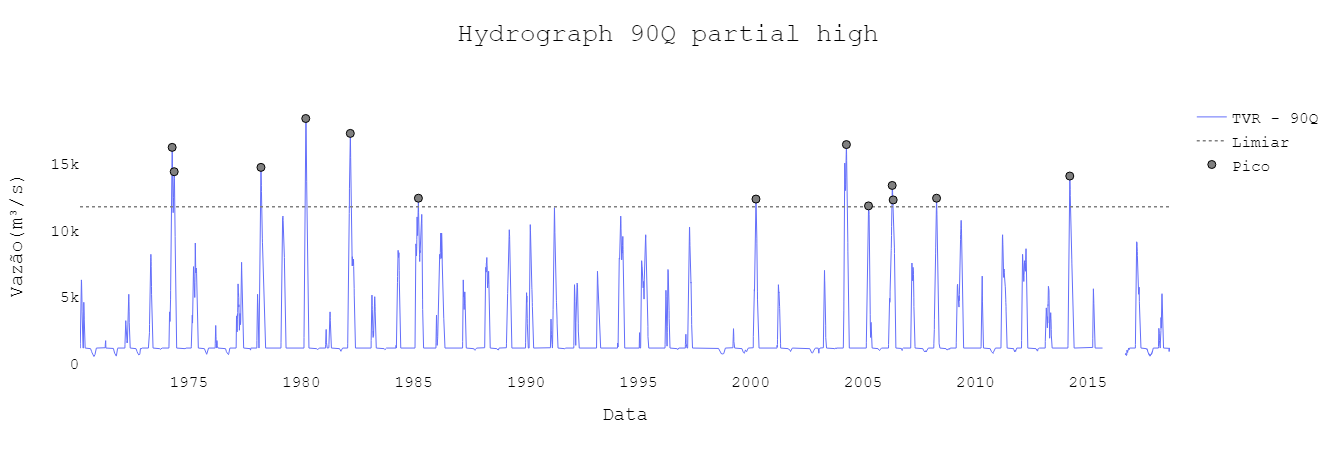

In [11]:
fig_partial_high_scenery_90q, data_fig_partial_high_scenery_90q = partial_high_scenery_90q.hydrogram(title="Hydrograph 90Q partial high", color={"Natural": "#002e6f"})

del data_fig_partial_high_scenery_90q[2]
del data_fig_partial_high_scenery_90q[2]

layout = fig_partial_high_scenery_90q['layout']

fig_partial_high_scenery_90q_del = dict(data=data_fig_partial_high_scenery_90q, layout=layout)

py.offline.iplot(fig_partial_high_scenery_90q_del)

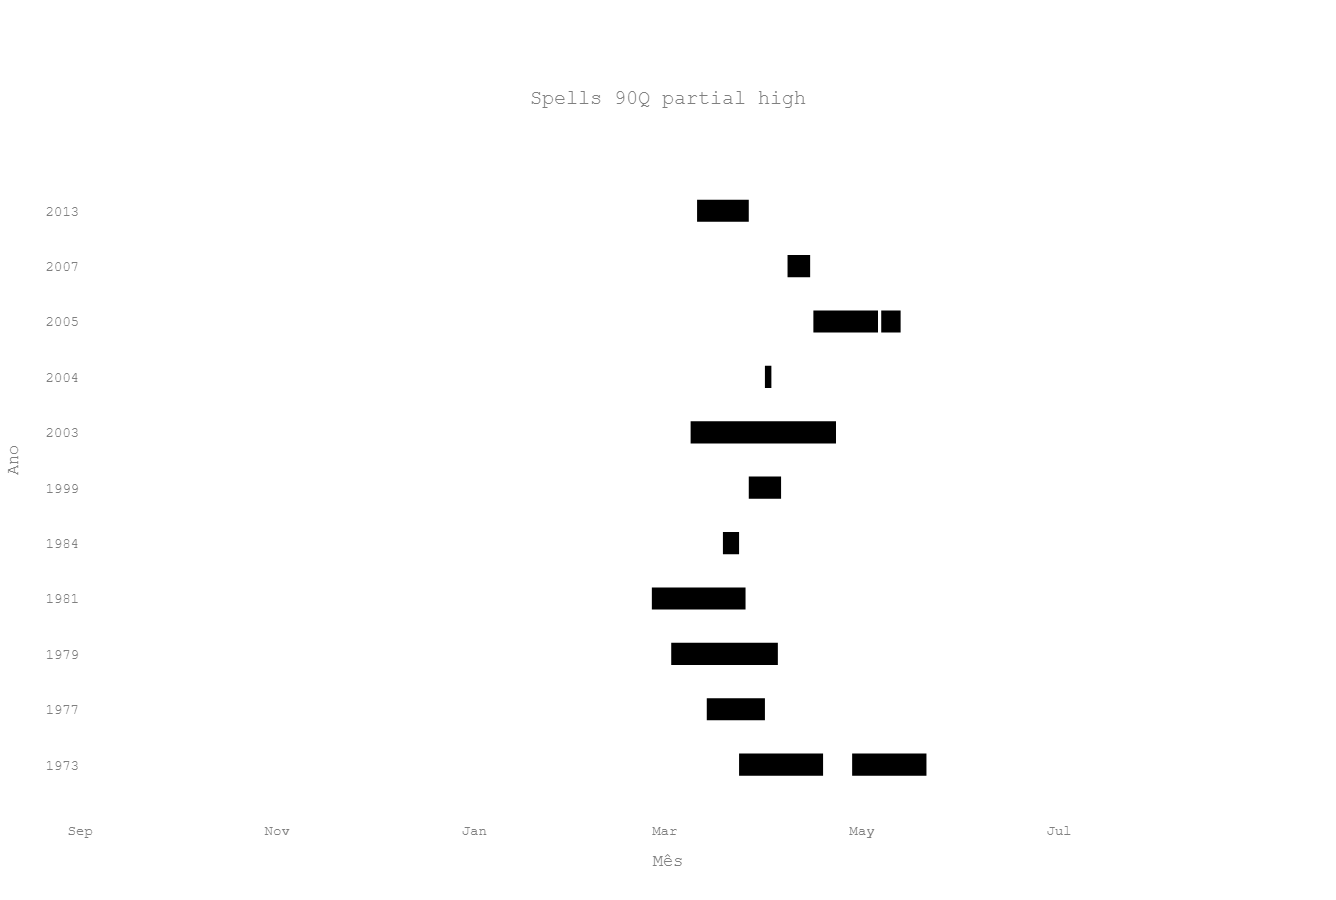

In [12]:
fig_spells_scenery_90q, fig_data_spells_scenery_90q = partial_high_scenery_90q.plot_spells(title="Spells 90Q partial high")
py.offline.iplot(fig_spells_scenery_90q)

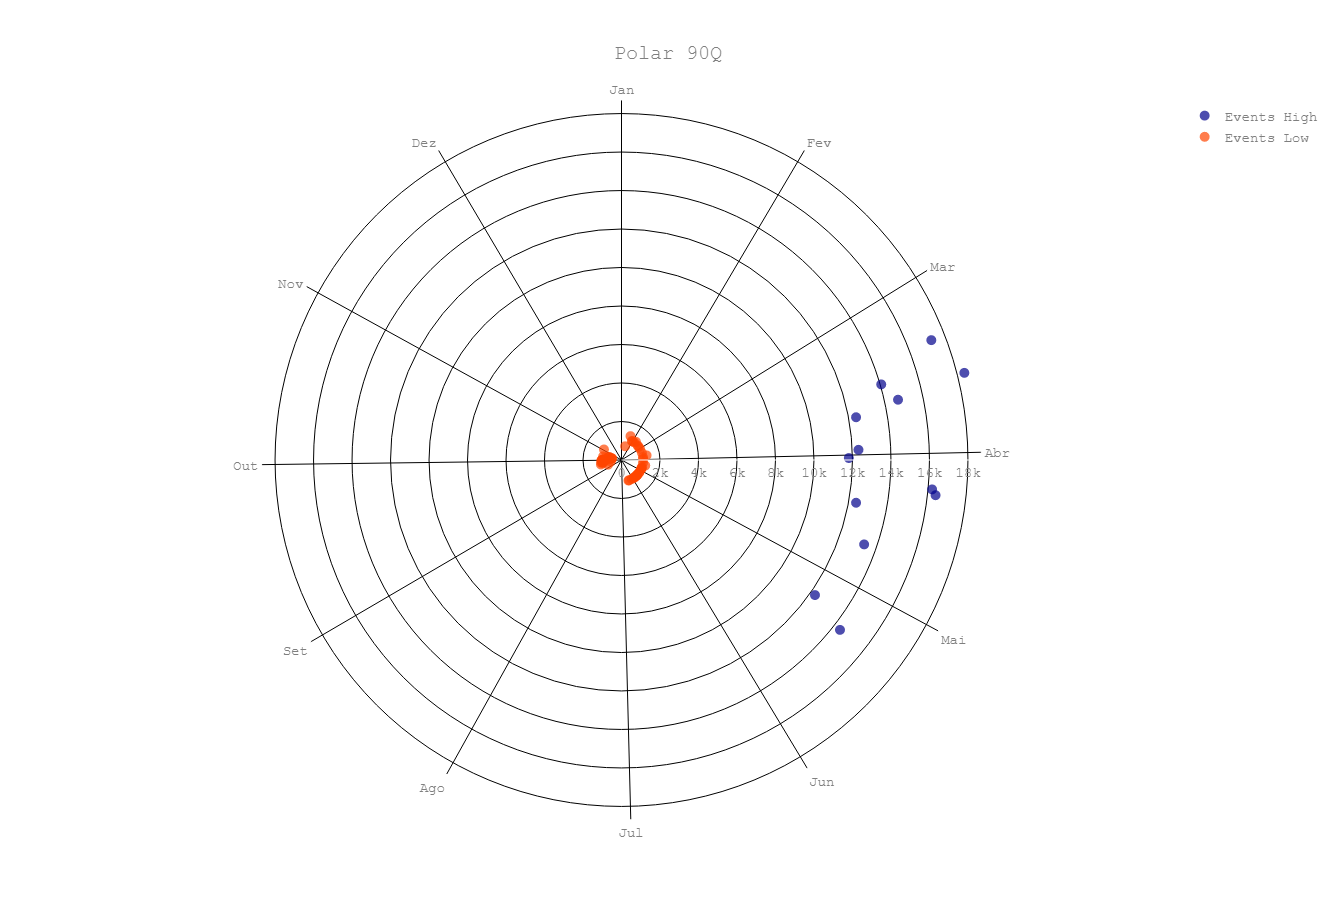

In [13]:
fig_polar_scenery_90q_high, fig_polar_data_scenery_90q_high = partial_high_scenery_90q.polar(title="Events High", color="#00008B")
fig_polar_scenery_90q_low, fig_polar_data_scenery_90q_low = partial_low_scenery_90q.polar(title="Events Low", color="#FF4500")

layout=fig_polar_scenery_90q_high['layout']

layout['title']['text'] = "Polar 90Q"
fig_polar_scenery_90q = dict(data=fig_polar_data_scenery_90q_high+[fig_polar_data_scenery_90q_low[0]], layout=fig_polar_scenery_90q_high['layout'])

py.offline.iplot(fig_polar_scenery_90q)

## Magnitude e Duraction

In [14]:
mag_dur_data_scenery_90q, mag_dur_metric_scenery_90q  = iha_sim_scenery_90q.magnitude_and_duration()
mag_dur_metric_scenery_90q

,Coeff. of Var.,Means
1-day maximum,0.473461,8785.030625
1-day minimum,0.213858,934.626250
3-day maximum,0.475350,8733.204514
3-day minimum,0.211049,939.147153
30-day maximum,0.514699,7451.664708
30-day minimum,0.184392,976.580938
7-day maximum,0.478824,8602.634077
7-day minimum,0.206528,946.486012
90-day maximum,0.546099,5040.366481
90-day minimum,0.111297,1042.131356


## Timing Extreme

In [15]:
timing_data_scenery_90q, timing_metric_scenery_90q = iha_sim_scenery_90q.timing_extreme()
timing_metric_scenery_90q

,Coeff. of Var.,Means
Date of maximum,0.403242,101.208333
Date of minimum,0.154838,258.729167


## Rate and Frequency

In [16]:
rate_freq_data_scenery_90q, rate_freq_metric_scenery_90q = iha_sim_scenery_90q.rate_and_frequency()
rate_freq_metric_scenery_90q

,Coeff. of Var.,Means
Rise rate,0.480469,250.164538
Fall rate,-0.434804,-204.011516
Number of reversals,0.592191,20.979592


## Polar Natural x 90Q

In [17]:
iha_natural = IHA(data_natural, month_water=month_water, status='pre', statistic='non-parametric', central_metric='mean', 
                                      variation_metric='cv',  type_criterion=None, type_threshold="stationary", duration=0,
                                      threshold_high=threshold_high, threshold_low=threshold_low, source="ONS", station='Natural')

In [18]:
freq_dur_data_natural, freq_dur_metric_natural, partial_high_natural, partial_low_natural = iha_natural.frequency_and_duration()

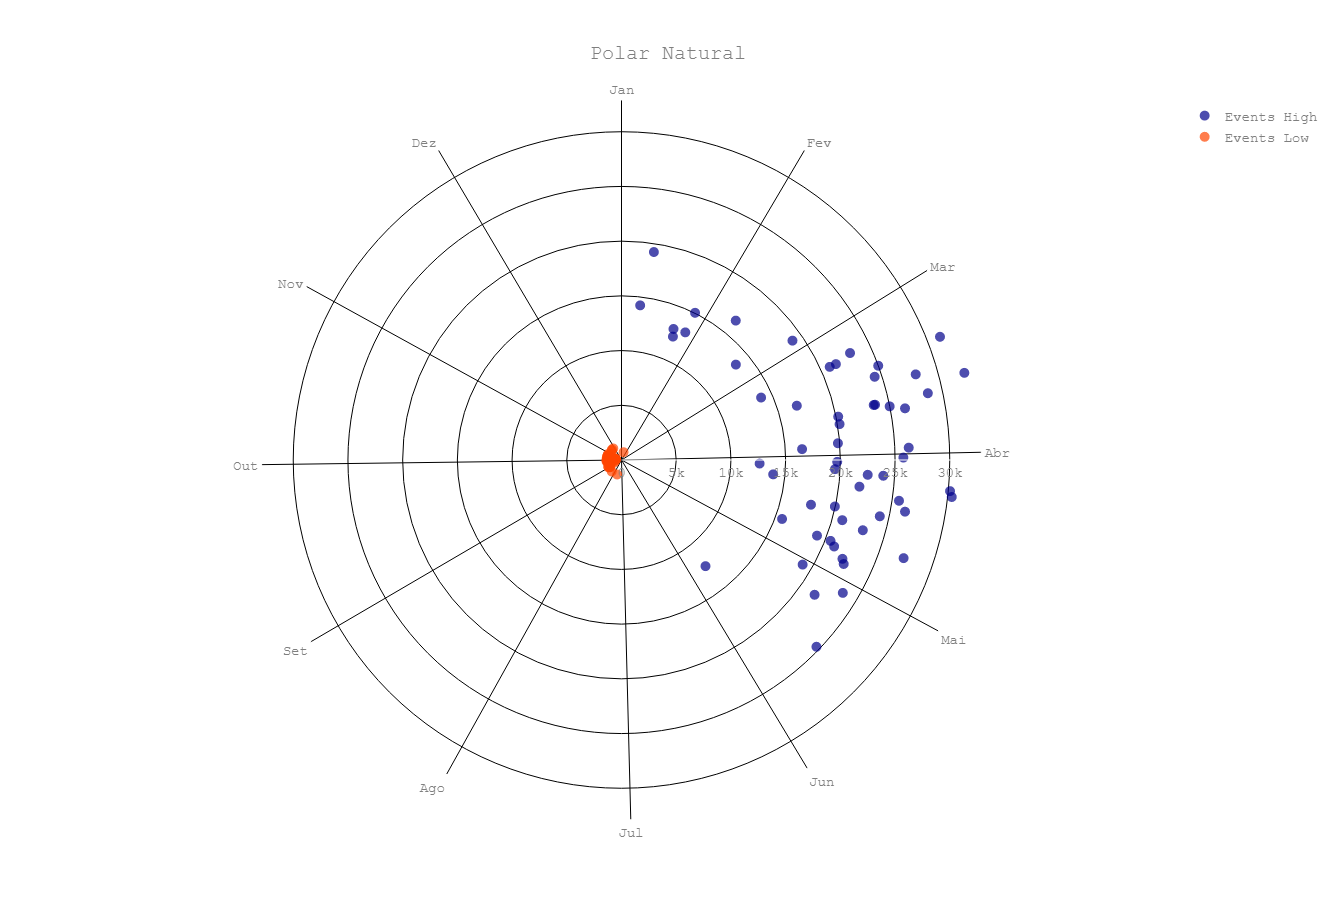

In [19]:
fig_polar_natural_high, fig_polar_data_natural_high = partial_high_natural.polar(title="Events High", color="#00008B")
fig_polar_natural_low, fig_polar_data_natural_low = partial_low_natural.polar(title="Events Low", color="#FF4500")

layout=fig_polar_natural_high['layout']

layout['title']['text'] = "Polar Natural"
fig_polar_natural = dict(data=fig_polar_data_natural_high+[fig_polar_data_natural_low[0]], layout=fig_polar_natural_high['layout'])

py.offline.iplot(fig_polar_natural)

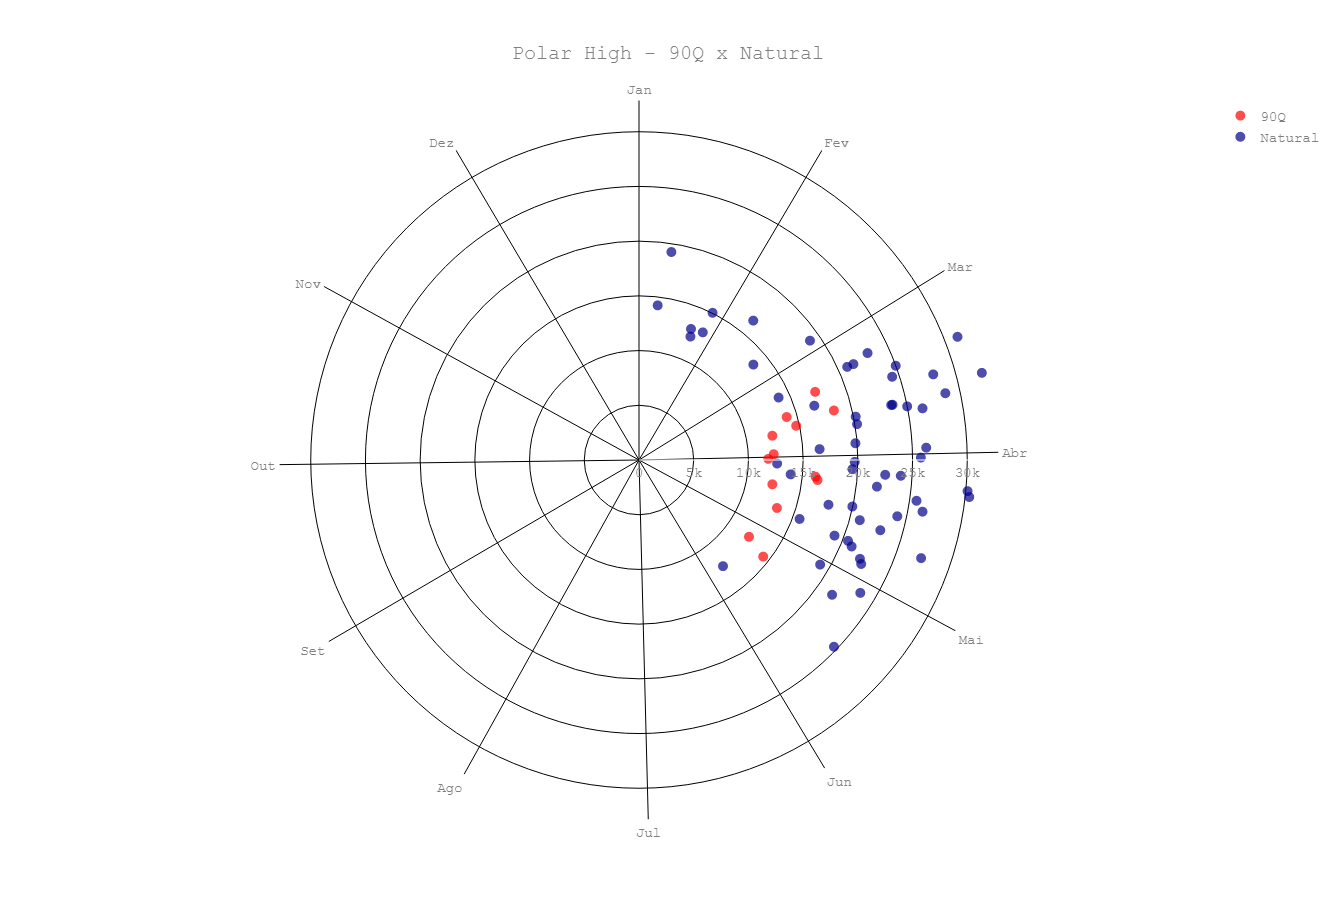

In [20]:
layout=fig_polar_scenery_90q['layout']

layout['title']['text'] = "Polar High - 90Q x Natural"
fig_polar_data_scenery_90q_high[0]['marker']['color'] = "red"
fig_polar_data_scenery_90q_high[0]['name'] = "90Q"
fig_polar_data_natural_high[0]['name'] = "Natural"
fig_polar_natural_scenery_90q = dict(data=fig_polar_data_scenery_90q_high+[fig_polar_data_natural_high[0]], layout=layout)

py.offline.iplot(fig_polar_natural_scenery_90q)